In [14]:
from PIL import Image
import numpy as np
import cv2

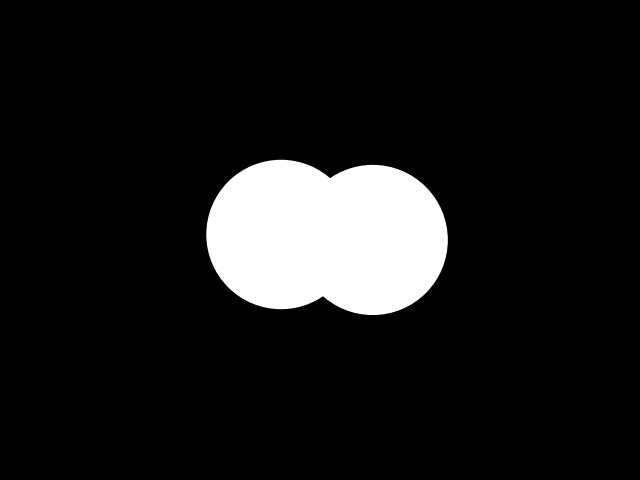

In [36]:
img = r"C:\Users\DHO_d\OneDrive\PE\haller_index_process\data\synthetic_ct_pe\pre_surgery\ct_424.png"
Image.open(img)

In [37]:
image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
# Step 2: Threshold the image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

# Step 3: Noise reduction (morphological opening)
kernel = np.ones((5,5), np.uint8)  # Adjust the kernel size as needed
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Step 4: Fill small gaps (morphological closing)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)


In [39]:
rows, cols = np.where(binary_image == 255)

min_col, max_col = cols.min(), cols.max()

center_col = (min_col + max_col) // 2

white_pixel_rows = np.where(binary_image[:, center_col]==255)[0]

if white_pixel_rows.size >0:
    vertical_distance= white_pixel_rows.max() - white_pixel_rows.min()  
else:
    vertical_distance = 0

print(vertical_distance)    

125


In [41]:

horizontal_distances = []

for row in range(binary_image.shape[0]):
    white_pixel_columns = np.where(binary_image[row, :] == 255)[0]
    
    if white_pixel_columns.size > 0:
        horizontal_distance = white_pixel_columns.max()-white_pixel_columns.min()
        horizontal_distances.append(horizontal_distance)

if horizontal_distances:
    max_horizontal_distance = max(horizontal_distances)
    print(max_horizontal_distance)
else:
    print("No horizontal distance found.")


241


In [42]:
print("Haller: ", max_horizontal_distance/vertical_distance)

Haller:  1.928


In [21]:
def haller_index(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5,5), np.uint8)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

    rows, cols = np.where(binary_image == 255)
    min_col, max_col = cols.min(), cols.max()
    center_col = (min_col + max_col) // 2
    white_pixel_rows = np.where(binary_image[:, center_col]==255)[0]
    if white_pixel_rows.size > 0:
        vertical_distance = white_pixel_rows.max() - white_pixel_rows.min()
    else:
        vertical_distance = 0

    horizontal_distances = []
    for row in range(binary_image.shape[0]):
        white_pixel_columns = np.where(binary_image[row, :] == 255)[0]
        if white_pixel_columns.size > 0:
            horizontal_distance = white_pixel_columns.max()-white_pixel_columns.min()
            horizontal_distances.append(horizontal_distance)

    if horizontal_distances:
        max_horizontal_distance = max(horizontal_distances)
        haller_index = max_horizontal_distance / vertical_distance
        return haller_index
    else:
        return None

